In [67]:
import h5py
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [68]:
def getData(cfileName):

    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")

    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

In [69]:
# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

In [70]:
def create_dataset(data, class_label):
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    print(len(f))
    print(len(t))
    print(Zxx.shape)

    del data

    Zxx = Zxx.transpose()

    Zxx = abs(Zxx)
    # scaling the features (only real part of the data can be used)
    scaler = MinMaxScaler()
    scaler.fit(Zxx)
    print(scaler.data_max_)
    Zxx = scaler.transform(Zxx)

    X = Zxx[:num_samp_per_class]
    Y = np.full(num_samp_per_class, class_label)

    return X, Y

## Validate the model with the dataset collected again in same phone

## iPhone13_I

In [71]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals_Validate/iPhone13/iPhone13_I_(ii)/"
    if(i==0):
        data = getData(folder_path + "calendar_app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera_photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera_video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home_screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web-browser_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_BeSh.csv', header=False)

[0.0234375+0.0078125j 0.0234375+0.015625j  0.0078125+0.015625j  ...
 0.015625 +0.0078125j 0.015625 +0.j        0.0234375+0.j       ]
2048
110831
(2048, 110831)
[0.01812677 0.00948843 0.00374635 ... 0.00173856 0.00339424 0.00953503]
0
(10000, 2048)
(10000,)
[0.015625 +0.0234375j 0.0234375+0.0078125j 0.015625 +0.j        ...
 0.03125  +0.j        0.015625 +0.015625j  0.015625 +0.015625j ]
2048
129100
(2048, 129100)
[0.0181794  0.00955586 0.00382046 ... 0.00183343 0.00367072 0.00966199]
1
(20000, 2048)
(20000,)
[0.0078125+0.015625j  0.0078125-0.015625j  0.0234375-0.0078125j ...
 0.0078125+0.j        0.015625 +0.j        0.015625 +0.j       ]
2048
109132
(2048, 109132)
[0.0182145  0.00951279 0.00374896 ... 0.00194378 0.00367706 0.00947664]
2
(30000, 2048)
(30000,)
[0.0234375+0.0078125j 0.03125  +0.j        0.0078125-0.0078125j ...
 0.0234375-0.0078125j 0.0234375+0.015625j  0.0234375+0.0078125j]
2048
127272
(2048, 127272)
[0.01857133 0.00952372 0.00331539 ... 0.00185035 0.00354866 0.0094942

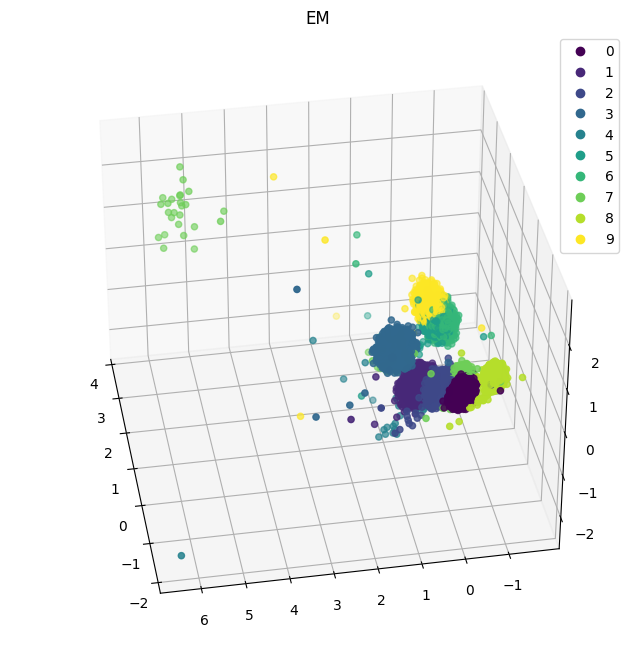

In [72]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_new_scatter.pdf')

In [12]:
data = pd.read_csv("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_BeSh.csv",comment='#',  index_col=0, header=None, low_memory=False).T
data

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,labels
1,0.354761,0.251940,0.313415,0.135391,0.200495,0.173035,0.124641,0.147967,0.237442,0.347813,...,0.758675,0.610564,0.331352,0.070046,0.138195,0.213710,0.288216,0.210625,0.305713,0.0
2,1.000000,1.000000,1.000000,0.229664,0.364977,0.698137,0.249421,0.339286,0.617257,0.866548,...,0.285702,1.000000,0.451987,0.306044,0.673599,1.000000,0.286931,0.380277,0.220284,0.0
3,0.064520,0.147281,0.702523,1.000000,1.000000,1.000000,0.658758,0.385118,0.359256,1.000000,...,0.662750,0.182109,1.000000,1.000000,1.000000,0.380349,0.435937,0.261134,0.386280,0.0
4,0.412444,0.297904,0.547711,0.247674,0.031909,0.239862,1.000000,1.000000,1.000000,0.252737,...,1.000000,0.792477,0.956228,0.552635,0.186194,0.334049,1.000000,0.892396,0.713437,0.0
5,0.516664,0.110744,0.190560,0.493138,0.992797,0.542566,0.459058,0.720996,0.439557,0.141808,...,0.597068,0.420540,0.734364,0.360055,0.960752,0.748869,0.704373,1.000000,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,0.918828,0.815953,0.091134,0.107117,0.128569,0.216114,0.351466,0.028997,0.160747,0.328030,...,0.207998,0.105453,0.106871,0.052489,0.092229,0.237689,0.148836,0.043870,0.883302,9.0
99997,0.923995,0.881314,0.043284,0.046681,0.186629,0.392609,0.370471,0.356642,0.400050,0.064875,...,0.193294,0.227318,0.264611,0.103859,0.098870,0.149887,0.155819,0.022215,0.862532,9.0
99998,0.934936,0.880113,0.048295,0.089611,0.238058,0.333065,0.109487,0.147201,0.232522,0.281287,...,0.109450,0.180500,0.272180,0.438714,0.419276,0.189462,0.066448,0.045147,0.868347,9.0
99999,0.962098,0.895634,0.185209,0.201892,0.028866,0.122628,0.172036,0.206806,0.234121,0.446502,...,0.470017,0.468455,0.188173,0.178710,0.077740,0.082211,0.046702,0.036750,0.908432,9.0


In [13]:
Y = labels = data['labels']
X = data = data.drop(columns=['labels'])

In [7]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_I_model.h5")

2023-02-13 11:24:43.340365: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 19s 6ms/step - loss: 11.0667 - accuracy: 0.0151
test loss, test acc: [11.066699028015137, 0.015110000036656857]


In [9]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 14s 4ms/step
[8 8 7 ... 8 2 4]
8


In [10]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[   0    0    0    0   17    0    0 1474 8509    0]
 [   0    0    0    0   24    0    1    0 9975    0]
 [   1    0    0    0  122    0    0   19 9858    0]
 [   1   57    0    0    0    0    3    0 9939    0]
 [   1   21    3    0  841    7    3    0 9124    0]
 [   0  102 2031    1 5191    3    0    0 2672    0]
 [   1  169  668    1 8249  130    0    0  782    0]
 [  26    5    0    0  287    0    0  654 9028    0]
 [   0    0    0    0    1    0    0 9986   13    0]
 [   2 1127 5374    1 2226   20    0    0 1250    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.00      0.00      0.00     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.05      0.08      0.06     10000
           5       0.02      0.00      0.00     10000
           6       0.00      0.00      0.00     10000
           7       0.05      0.07   

Test Accuracy:0.01511


Text(0.5, 1.0, 'Accuracy:0.015')

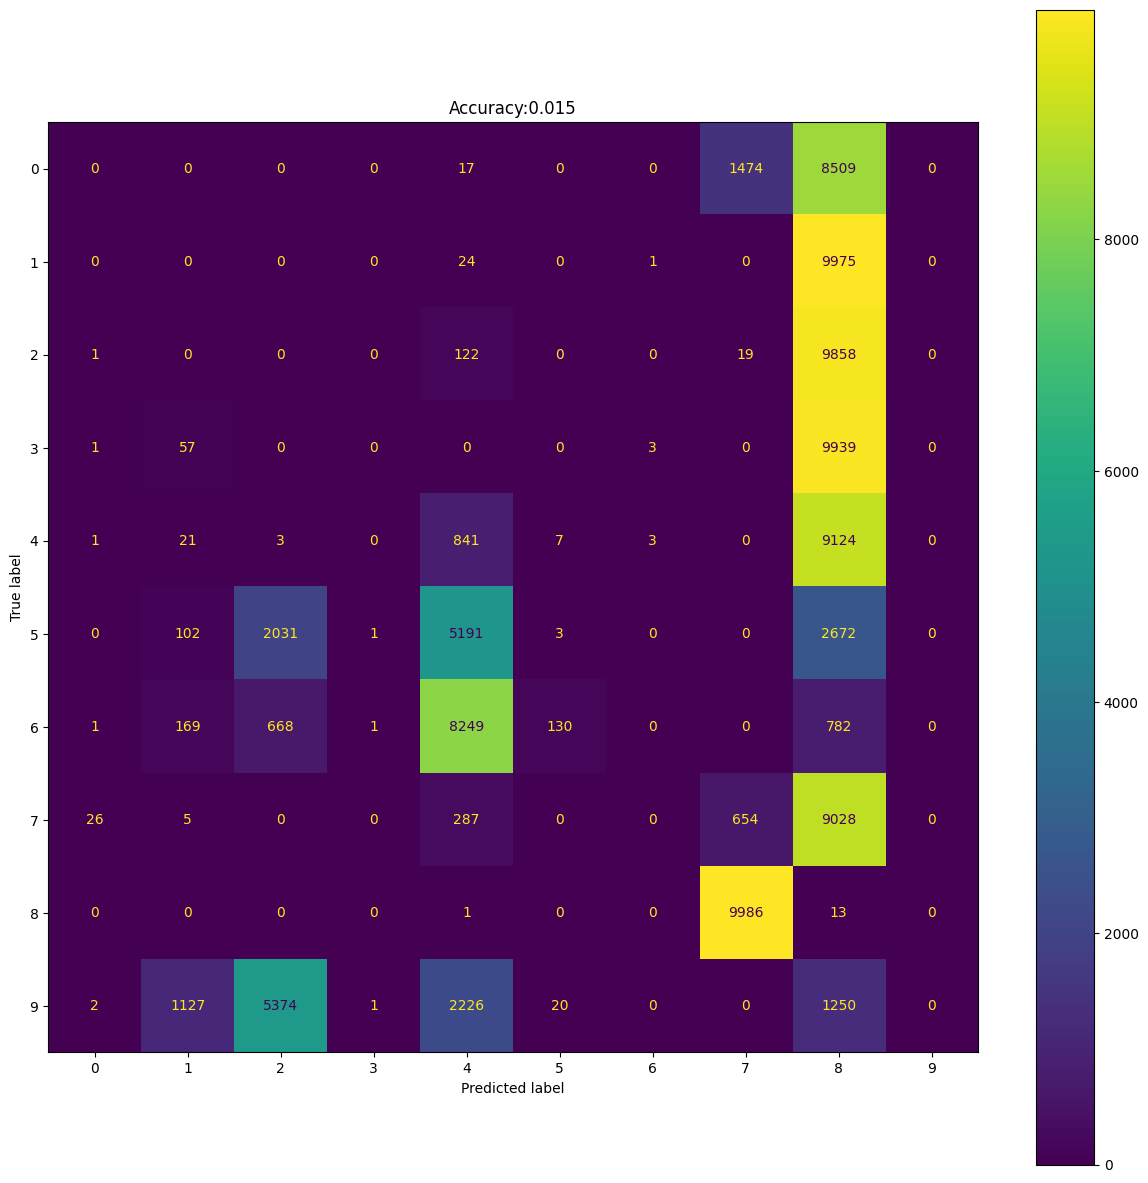

In [11]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_combined/iPhone13_II&III_confusion_matrix.pdf')

## Apply transfer learning for the samples by only training the output layer

In [2]:
data = pd.read_csv("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_BeSh.csv",comment='#',  index_col=0, header=None, low_memory=False).T
data

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,labels
1,0.354761,0.251940,0.313415,0.135391,0.200495,0.173035,0.124641,0.147967,0.237442,0.347813,...,0.758675,0.610564,0.331352,0.070046,0.138195,0.213710,0.288216,0.210625,0.305713,0.0
2,1.000000,1.000000,1.000000,0.229664,0.364977,0.698137,0.249421,0.339286,0.617257,0.866548,...,0.285702,1.000000,0.451987,0.306044,0.673599,1.000000,0.286931,0.380277,0.220284,0.0
3,0.064520,0.147281,0.702523,1.000000,1.000000,1.000000,0.658758,0.385118,0.359256,1.000000,...,0.662750,0.182109,1.000000,1.000000,1.000000,0.380349,0.435937,0.261134,0.386280,0.0
4,0.412444,0.297904,0.547711,0.247674,0.031909,0.239862,1.000000,1.000000,1.000000,0.252737,...,1.000000,0.792477,0.956228,0.552635,0.186194,0.334049,1.000000,0.892396,0.713437,0.0
5,0.516664,0.110744,0.190560,0.493138,0.992797,0.542566,0.459058,0.720996,0.439557,0.141808,...,0.597068,0.420540,0.734364,0.360055,0.960752,0.748869,0.704373,1.000000,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,0.918828,0.815953,0.091134,0.107117,0.128569,0.216114,0.351466,0.028997,0.160747,0.328030,...,0.207998,0.105453,0.106871,0.052489,0.092229,0.237689,0.148836,0.043870,0.883302,9.0
99997,0.923995,0.881314,0.043284,0.046681,0.186629,0.392609,0.370471,0.356642,0.400050,0.064875,...,0.193294,0.227318,0.264611,0.103859,0.098870,0.149887,0.155819,0.022215,0.862532,9.0
99998,0.934936,0.880113,0.048295,0.089611,0.238058,0.333065,0.109487,0.147201,0.232522,0.281287,...,0.109450,0.180500,0.272180,0.438714,0.419276,0.189462,0.066448,0.045147,0.868347,9.0
99999,0.962098,0.895634,0.185209,0.201892,0.028866,0.122628,0.172036,0.206806,0.234121,0.446502,...,0.470017,0.468455,0.188173,0.178710,0.077740,0.082211,0.046702,0.036750,0.908432,9.0


In [3]:
Y = labels = data['labels']
X = data = data.drop(columns=['labels'])

iPhone13_I Beer Sheva Dataset to iPhone13_I model

In [12]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_I_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [18]:
# Presumably you would want to first load pre-trained weights.
model.load_weights("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_I_model.h5")

In [13]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-trai

In [14]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [15]:
history = model.fit(X, Y, epochs=25)

Epoch 1/25
3125/3125 [==============================] - 18s 6ms/step - loss: 2.2405 - accuracy: 0.3322
Epoch 2/25
3125/3125 [==============================] - 18s 6ms/step - loss: 1.0096 - accuracy: 0.6091
Epoch 3/25
3125/3125 [==============================] - 17s 5ms/step - loss: 0.8593 - accuracy: 0.6908
Epoch 4/25
3125/3125 [==============================] - 17s 5ms/step - loss: 0.7886 - accuracy: 0.7210
Epoch 5/25
3125/3125 [==============================] - 18s 6ms/step - loss: 0.7468 - accuracy: 0.7356
Epoch 6/25
3125/3125 [==============================] - 16s 5ms/step - loss: 0.7178 - accuracy: 0.7450
Epoch 7/25
3125/3125 [==============================] - 17s 6ms/step - loss: 0.6958 - accuracy: 0.7512
Epoch 8/25
3125/3125 [==============================] - 17s 6ms/step - loss: 0.6786 - accuracy: 0.7575
Epoch 9/25
3125/3125 [==============================] - 18s 6ms/step - loss: 0.6640 - accuracy: 0.7621
Epoch 10/25
3125/3125 [==============================] - 16s 5ms/step - l

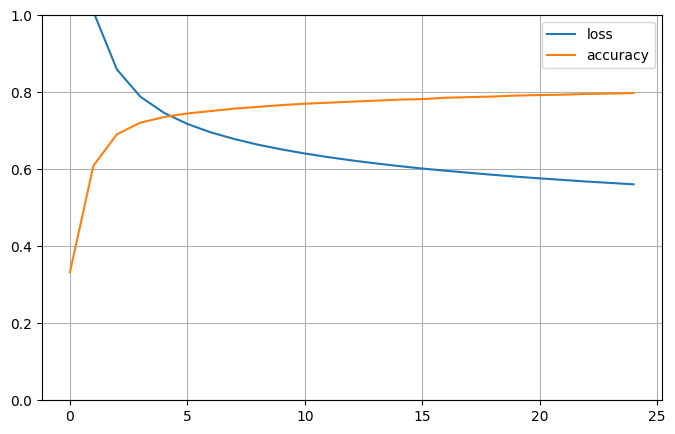

In [16]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Testing the accuracy

In [17]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 0.5574 - accuracy: 0.7990
test loss, test acc: [0.5573502779006958, 0.7990300059318542]


In [18]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 14s 4ms/step
[1 2 8 ... 9 9 5]
1


In [19]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[8657    2  311    0    0    0    0  951   79    0]
 [   0 7917  672  114 1238   10    4   45    0    0]
 [ 473  723 6692    3  204    0    1 1898    6    0]
 [   0  136    0 9846   17    0    0    0    0    1]
 [   0 1232  181   25 7752  169  468  156    0   17]
 [   0   21    0    1  138 6548 1500    1    0 1791]
 [   0    1    2    2  352 1240 7974    1    0  428]
 [1267   39 1496   48   46    0    2 7003   93    6]
 [  91    0    1    1    0    0    0   16 9891    0]
 [   0    2    0    3   15 1728  629    0    0 7623]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85     10000
           1       0.79      0.79      0.79     10000
           2       0.72      0.67      0.69     10000
           3       0.98      0.98      0.98     10000
           4       0.79      0.78      0.78     10000
           5       0.68      0.65      0.66     10000
           6       0.75      0.80      0.78     10000
           7       0.70      0.70   

Test Accuracy:0.79903


Text(0.5, 1.0, 'Accuracy:0.799')

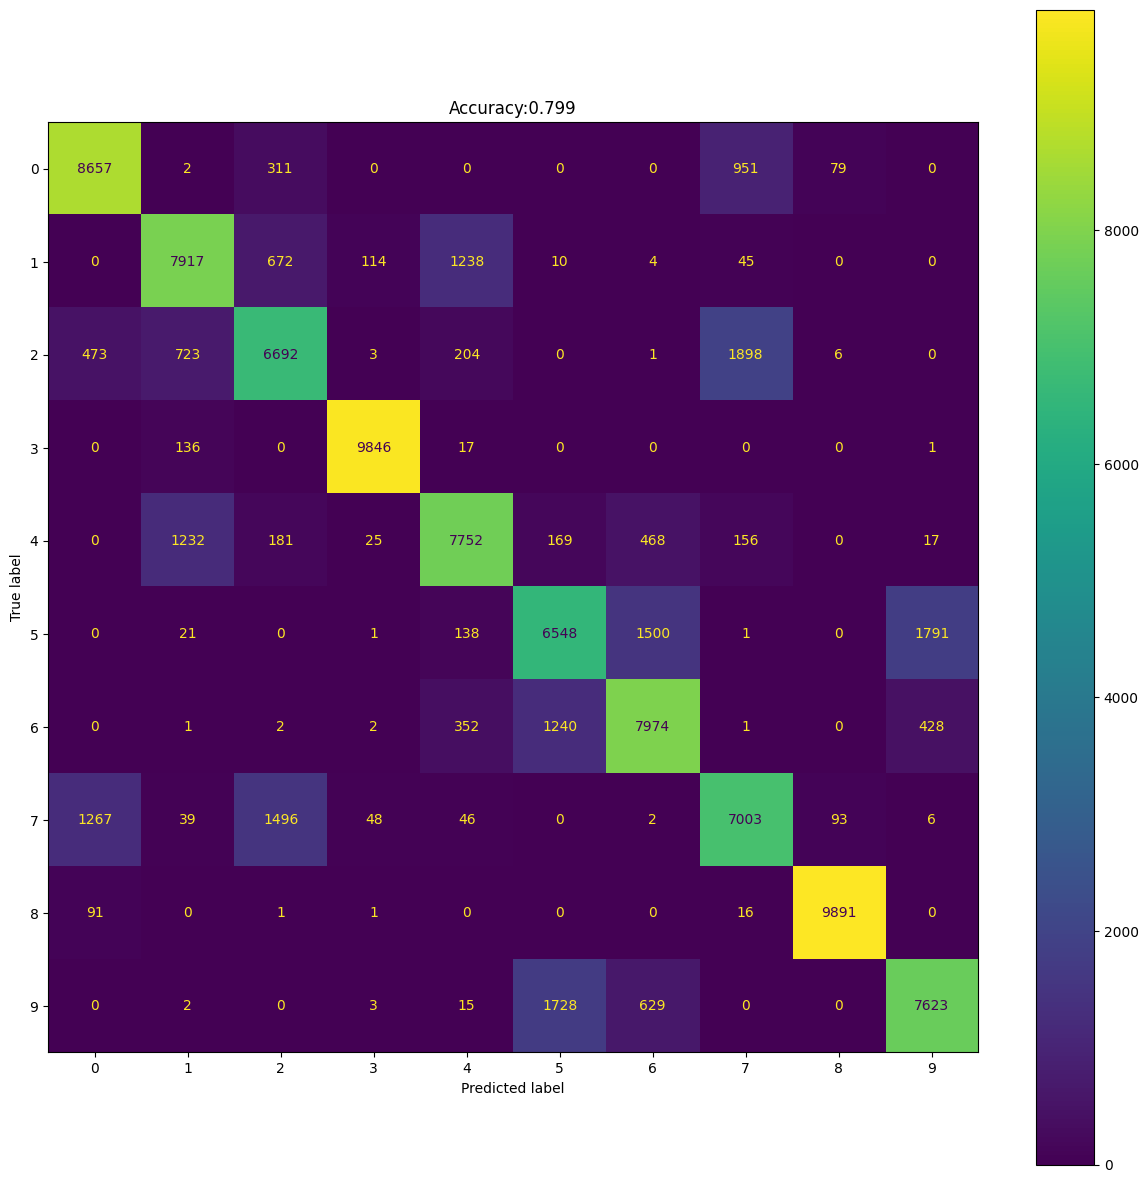

In [20]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_combined/iPhone13_II&III_confusion_matrix.pdf')

## Validation with another samples
Validate with iPhone6s_I_BeSh dataset

In [25]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals_Location_oriented/iPhone13_Beer Sheve,Israel/"
    if(i==0):
        data = getData(folder_path + "calendar_app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera_photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera_video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home_screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_BeSh.csv', header=False)

[ 0.0859375+0.09375j    0.5625   -0.8046875j -0.984375 +0.4921875j ...
  0.015625 +0.0078125j  0.015625 +0.j         0.0078125+0.0078125j]
2048
143874
(2048, 143874)
[0.04423329 0.07092105 0.03909327 ... 0.03002222 0.05070389 0.04089695]
0
(10000, 2048)
(10000,)
[0.0078125+0.j        0.0234375-0.0078125j 0.015625 +0.015625j  ...
 0.0234375+0.j        0.015625 +0.0078125j 0.015625 -0.0078125j]
2048
141168
(2048, 141168)
[0.01816647 0.00949077 0.0032181  ... 0.00174878 0.00344826 0.00946195]
1
(20000, 2048)
(20000,)
[ 0.0078125+0.j        -0.0078125+0.0078125j  0.0234375+0.015625j  ...
  0.015625 +0.j         0.015625 +0.0078125j  0.015625 +0.j       ]
2048
154773
(2048, 154773)
[0.01807312 0.00971989 0.00374065 ... 0.00206749 0.00380799 0.00961199]
2
(30000, 2048)
(30000,)
[0.0078125+0.j        0.0234375+0.0078125j 0.015625 +0.j        ...
 0.0234375+0.0078125j 0.015625 +0.015625j  0.015625 +0.0078125j]
2048
131588
(2048, 131588)
[0.02084354 0.01262699 0.00525135 ... 0.00556843 0.005412

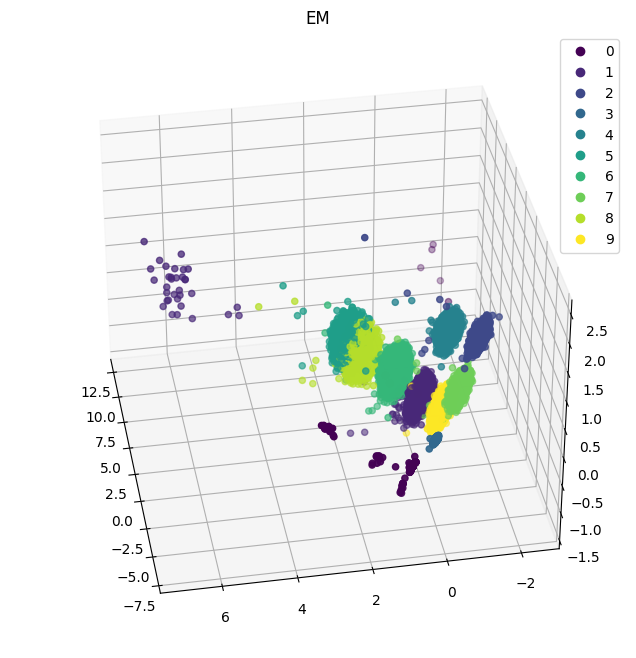

In [26]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_BeSh_scatter.pdf')

In [27]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_I_model.h5")

In [28]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 18s 6ms/step - loss: 8.2226 - accuracy: 0.1146
test loss, test acc: [8.222582817077637, 0.1146399974822998]


In [29]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 15s 5ms/step
[1 8 8 ... 8 8 8]
1


In [30]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[    0     1     0     0     0     0     0     0     4  9995]
 [   36   604    47     0     0     0  1084     0  8229     0]
 [    1     2     2  3129  1166    12     0  5658    30     0]
 [    0     0     0     0     0     0     0 10000     0     0]
 [    0   793  1569     0   937    27     0     0  6674     0]
 [ 9822     0     0     0     0     0   178     0     0     0]
 [   55    16     1     0     0     0  9919     0     9     0]
 [    1     0     0     0   138     1     0     2  9858     0]
 [ 8872     0     0     0     0     0  1128     0     0     0]
 [    0    43    30     0    32     0     1     0  9894     0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.41      0.06      0.11     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.41      0.09      0.15     10000
           5       0.00      0.00      0.00 

Test Accuracy:0.11464


Text(0.5, 1.0, 'Accuracy:0.115')

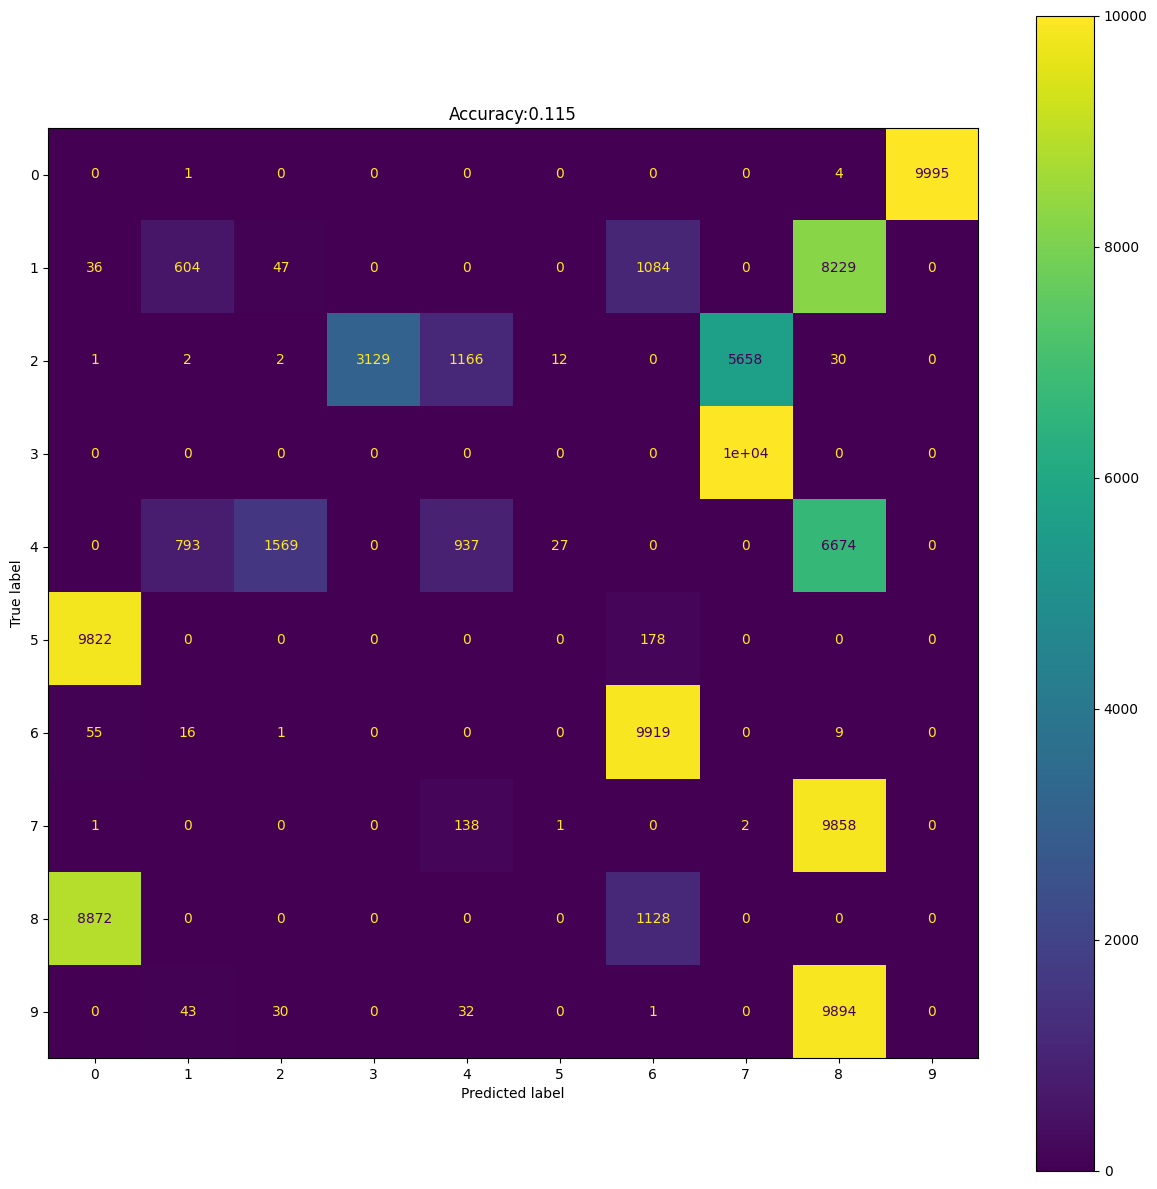

In [31]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_combined/iPhone13_II&III_confusion_matrix.pdf')

Apply transfer learning 

In [32]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_I_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [33]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-trai

In [34]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
history = model.fit(X, Y, epochs=25)

Epoch 1/25
3125/3125 [==============================] - 18s 5ms/step - loss: 1.2733 - accuracy: 0.6097
Epoch 2/25
3125/3125 [==============================] - 13s 4ms/step - loss: 0.4536 - accuracy: 0.8409
Epoch 3/25
3125/3125 [==============================] - 13s 4ms/step - loss: 0.3599 - accuracy: 0.8861
Epoch 4/25
3125/3125 [==============================] - 12s 4ms/step - loss: 0.3204 - accuracy: 0.9015
Epoch 5/25
3125/3125 [==============================] - 12s 4ms/step - loss: 0.2982 - accuracy: 0.9060
Epoch 6/25
3125/3125 [==============================] - 13s 4ms/step - loss: 0.2839 - accuracy: 0.9084
Epoch 7/25
3125/3125 [==============================] - 16s 5ms/step - loss: 0.2735 - accuracy: 0.9096
Epoch 8/25
3125/3125 [==============================] - 14s 5ms/step - loss: 0.2656 - accuracy: 0.9110
Epoch 9/25
3125/3125 [==============================] - 14s 4ms/step - loss: 0.2591 - accuracy: 0.9125
Epoch 10/25
3125/3125 [==============================] - 14s 5ms/step - l

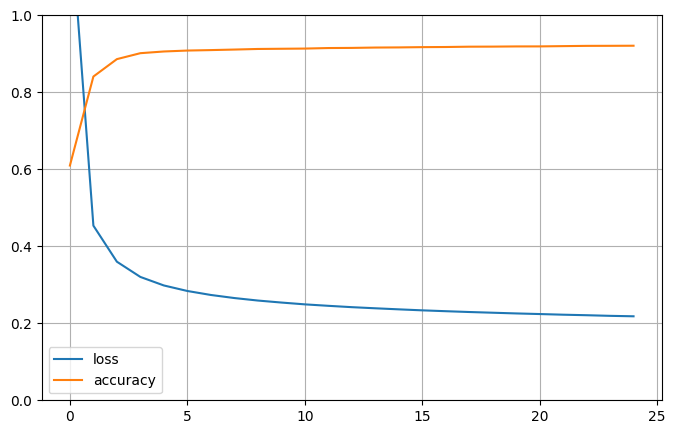

In [35]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [36]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 16s 5ms/step - loss: 0.2162 - accuracy: 0.9223
test loss, test acc: [0.2162187248468399, 0.9223499894142151]


In [37]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 18s 6ms/step
[1 1 1 ... 9 4 9]
1


In [38]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[ 9995     5     0     0     0     0     0     0     0     0]
 [    0  9662     0     0    32    33   110     0     2   161]
 [    0     4  9983     0     0     1     1    10     0     1]
 [    0     0     0 10000     0     0     0     0     0     0]
 [    0    23     4     0  8938     0     0    52     0   983]
 [    0     0     0     0     0  7895    37     0  2068     0]
 [    0   177     0     0     0    12  9741     0    70     0]
 [    0     2     5     0    44     1     0  9812     0   136]
 [    0     0     0     0     0  2101   132     0  7767     0]
 [    0   218     0     0  1139     0     1   200     0  8442]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       0.96      0.97      0.96     10000
           2       1.00      1.00      1.00     10000
           3       1.00      1.00      1.00     10000
           4       0.88      0.89      0.89     10000
           5       0.79      0.79      0.79 

Test Accuracy:0.92235


Text(0.5, 1.0, 'Accuracy:0.922')

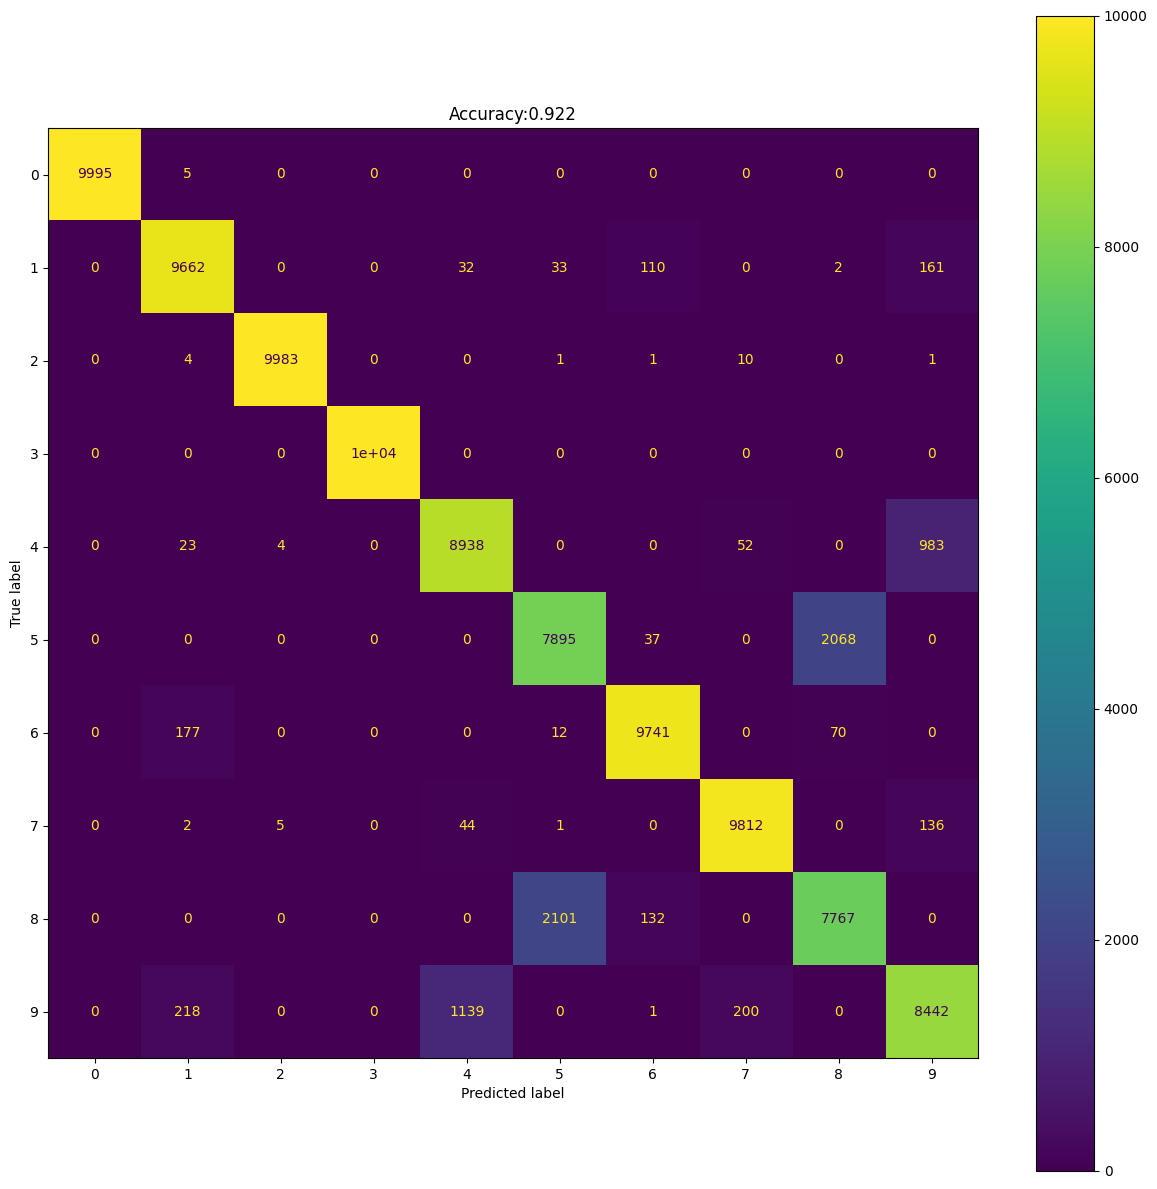

In [39]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_combined/iPhone13_II&III_confusion_matrix.pdf')

## Cross device experiment among iPhone13

iPhone13_I Beer Sheva Dataset to iPhone13_II model

In [40]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_II_model.h5")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [41]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [42]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
history = model.fit(X, Y, epochs=25)

Epoch 1/25
3125/3125 [==============================] - 19s 6ms/step - loss: 0.9751 - accuracy: 0.6710
Epoch 2/25
3125/3125 [==============================] - 16s 5ms/step - loss: 0.4144 - accuracy: 0.8531
Epoch 3/25
3125/3125 [==============================] - 13s 4ms/step - loss: 0.3589 - accuracy: 0.8749
Epoch 4/25
3125/3125 [==============================] - 12s 4ms/step - loss: 0.3299 - accuracy: 0.8845
Epoch 5/25
3125/3125 [==============================] - 12s 4ms/step - loss: 0.3105 - accuracy: 0.8905
Epoch 6/25
3125/3125 [==============================] - 19s 6ms/step - loss: 0.2965 - accuracy: 0.8942
Epoch 7/25
3125/3125 [==============================] - 15s 5ms/step - loss: 0.2856 - accuracy: 0.8973
Epoch 8/25
3125/3125 [==============================] - 20s 6ms/step - loss: 0.2767 - accuracy: 0.8997
Epoch 9/25
3125/3125 [==============================] - 14s 4ms/step - loss: 0.2692 - accuracy: 0.9018
Epoch 10/25
3125/3125 [==============================] - 12s 4ms/step - l

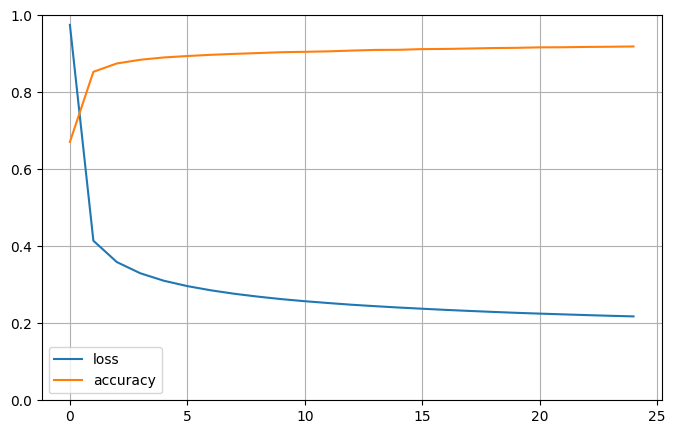

In [43]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [44]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 16s 5ms/step - loss: 0.2161 - accuracy: 0.9198
test loss, test acc: [0.2161354273557663, 0.9198399782180786]


In [45]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 15s 5ms/step
[9 9 9 ... 9 9 9]
9


In [46]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[ 9995     0     0     0     0     0     0     0     0     5]
 [    0  9532     0     0    17    34   255     0     5   157]
 [    0     0  9984     1     1     1     2     8     0     3]
 [    0     0     0 10000     0     0     0     0     0     0]
 [    0    12     0     0  9351     0     0   305     0   332]
 [    0     0     0     0     0  7392    18     0  2590     0]
 [    0   285     0     0     0     7  9580     0   128     0]
 [    0     0     0     0   258     2     0  9739     0     1]
 [    0     0     0     0     0  2863   209     0  6928     0]
 [    0   235     0     0   281     0     1     0     0  9483]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       0.95      0.95      0.95     10000
           2       1.00      1.00      1.00     10000
           3       1.00      1.00      1.00     10000
           4       0.94      0.94      0.94     10000
           5       0.72      0.74      0.73 

Test Accuracy:0.91984


Text(0.5, 1.0, 'Accuracy:0.920')

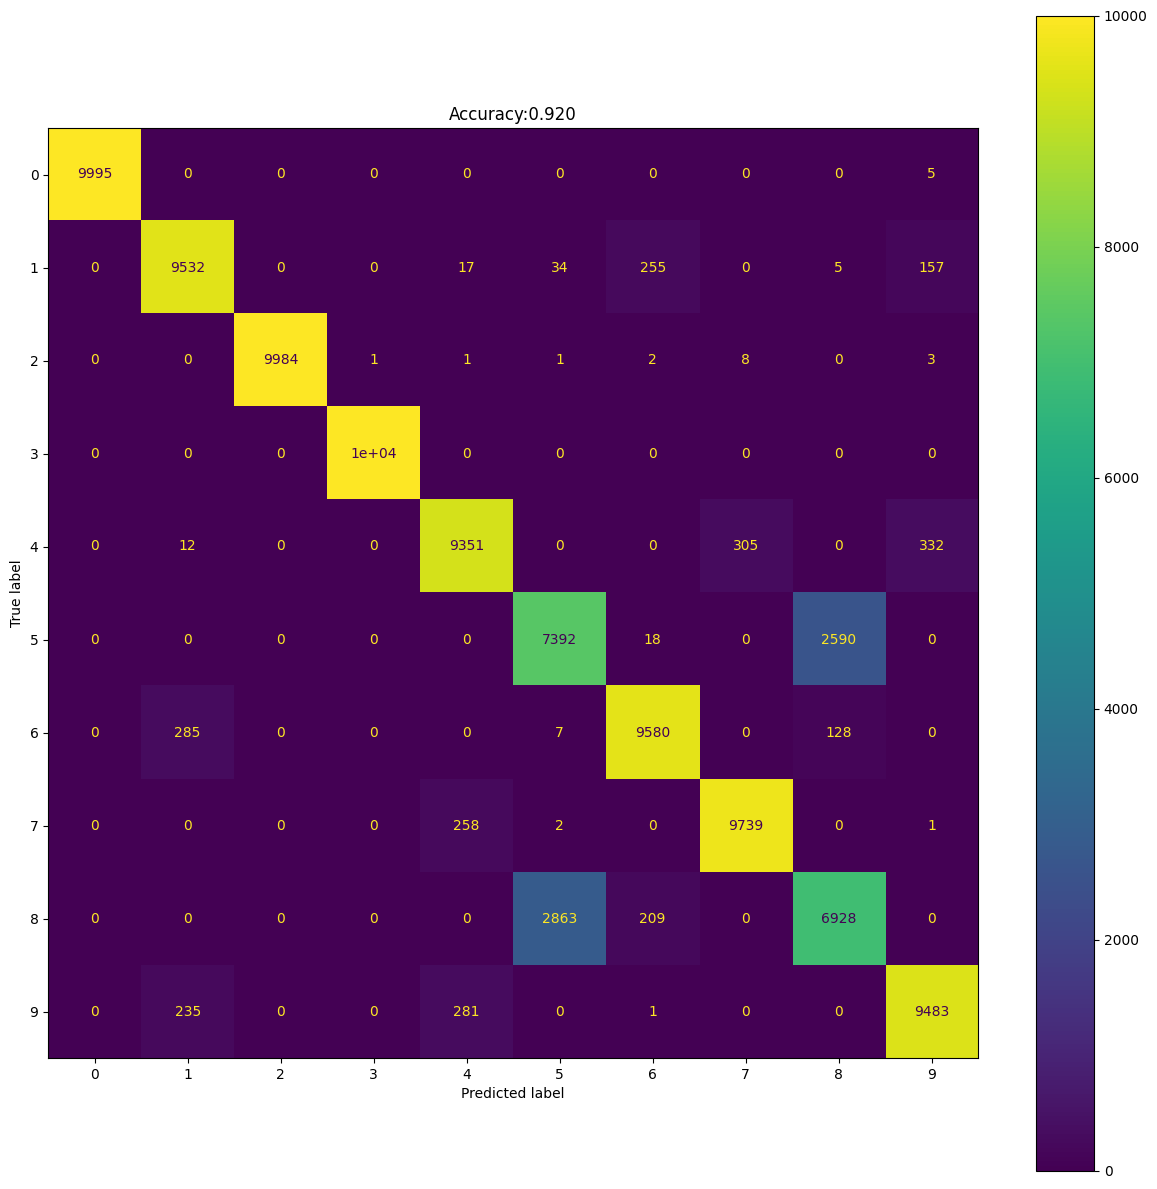

In [47]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_combined/iPhone13_II&III_confusion_matrix.pdf')

iPhone13_I Beer Sheva Dataset to iPhone13_III model

In [48]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_III_model.h5")
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [49]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [50]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
history = model.fit(X, Y, epochs=25)

Epoch 1/25
3125/3125 [==============================] - 18s 6ms/step - loss: 2.0045 - accuracy: 0.3237
Epoch 2/25
3125/3125 [==============================] - 16s 5ms/step - loss: 1.2611 - accuracy: 0.6029
Epoch 3/25
3125/3125 [==============================] - 16s 5ms/step - loss: 1.0649 - accuracy: 0.6995
Epoch 4/25
3125/3125 [==============================] - 16s 5ms/step - loss: 0.9408 - accuracy: 0.7784
Epoch 5/25
3125/3125 [==============================] - 23s 7ms/step - loss: 0.8525 - accuracy: 0.8214
Epoch 6/25
3125/3125 [==============================] - 14s 4ms/step - loss: 0.7857 - accuracy: 0.8394
Epoch 7/25
3125/3125 [==============================] - 16s 5ms/step - loss: 0.7327 - accuracy: 0.8481
Epoch 8/25
3125/3125 [==============================] - 14s 4ms/step - loss: 0.6898 - accuracy: 0.8549
Epoch 9/25
3125/3125 [==============================] - 14s 5ms/step - loss: 0.6542 - accuracy: 0.8616
Epoch 10/25
3125/3125 [==============================] - 13s 4ms/step - l

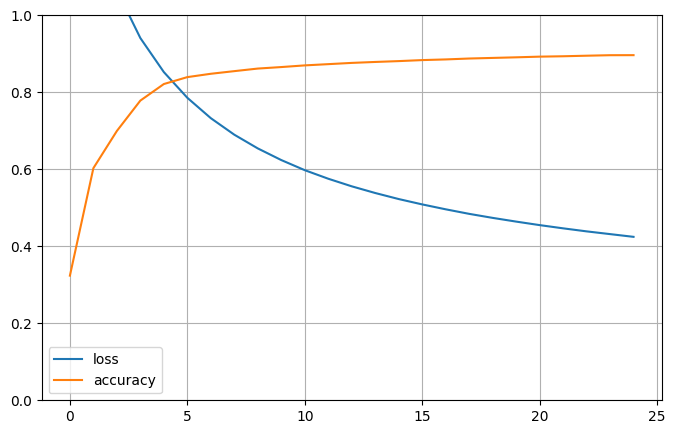

In [51]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [52]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 15s 5ms/step - loss: 0.4224 - accuracy: 0.8941
test loss, test acc: [0.42244696617126465, 0.8941199779510498]


In [53]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 13s 4ms/step
[8 8 8 ... 9 4 9]
8


In [54]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[ 9976     0     0     0     0    16     3     0     5     0]
 [    5  9187     0     0   463    35   264     4     1    41]
 [    1     8  9935     0     1     3     0    52     0     0]
 [    0     0     0 10000     0     0     0     0     0     0]
 [    1   324    67     2  8002     2     1   208     0  1393]
 [    0     0     0     0     0  9046     0     0   954     0]
 [    4   432     0     0     2     2  9550     0    10     0]
 [    1    25   108     0    13     2     3  9827     1    20]
 [    1     0     0     0     0   755    84     0  9160     0]
 [    2   527    82     2  3942     1     5   709     1  4729]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       0.87      0.92      0.90     10000
           2       0.97      0.99      0.98     10000
           3       1.00      1.00      1.00     10000
           4       0.64      0.80      0.71     10000
           5       0.92      0.90      0.91 

Test Accuracy:0.89412


Text(0.5, 1.0, 'Accuracy:0.894')

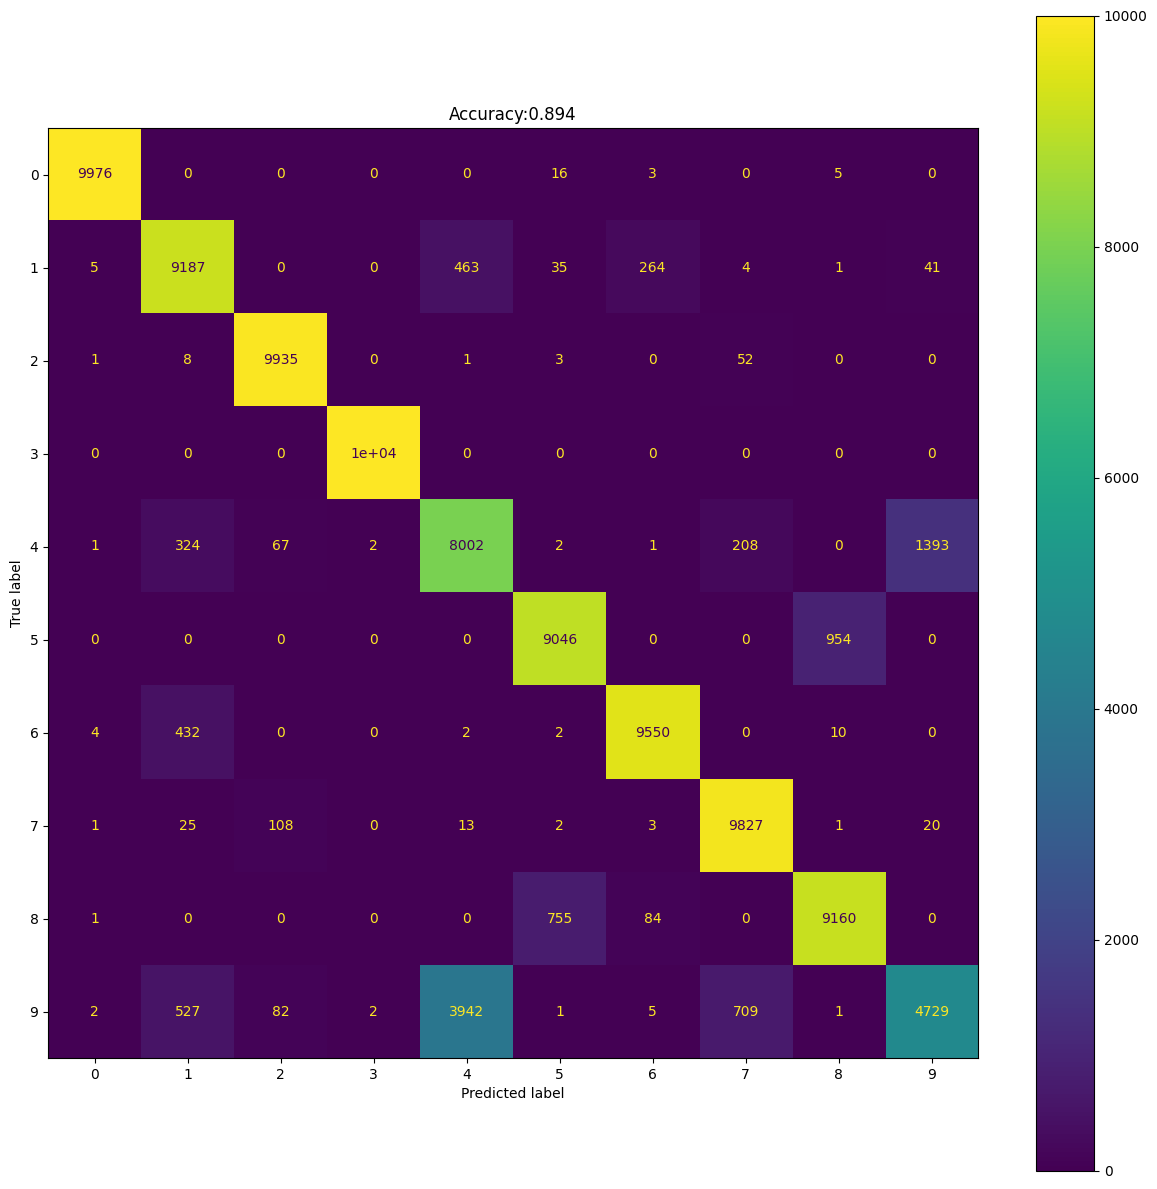

In [55]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_combined/iPhone13_II&III_confusion_matrix.pdf')

## iPhone13_I_BeSh Model

Create an own model of newly collected samples of iPhone13_I_BeSh by trainig the whole dataset for validate the time of training and accuracy level 

In [56]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [57]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [58]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [59]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/iPHONE6S_I_BeSh_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=25, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/25
2532/2532 [==============================] - 33s 12ms/step - loss: 1.9747 - accuracy: 0.5599 - val_loss: 1.4547 - val_accuracy: 0.8108
Epoch 2/25
2532/2532 [==============================] - 30s 12ms/step - loss: 0.8581 - accuracy: 0.9646 - val_loss: 0.3825 - val_accuracy: 0.9923
Epoch 3/25
2532/2532 [==============================] - 37s 15ms/step - loss: 0.2045 - accuracy: 0.9941 - val_loss: 0.0997 - val_accuracy: 0.9971
Epoch 4/25
2532/2532 [==============================] - 38s 15ms/step - loss: 0.0769 - accuracy: 0.9973 - val_loss: 0.0513 - val_accuracy: 0.9974
Epoch 5/25
2532/2532 [==============================] - 31s 12ms/step - loss: 0.0482 - accuracy: 0.9983 - val_loss: 0.0350 - val_accuracy: 0.9984
Epoch 6/25
2532/2532 [==============================] - 27s 11ms/step - loss: 0.0364 - accuracy: 0.9987 - val_loss: 0.0273 - val_accuracy: 0.9986
Epoch 7/25
2532/2532 [==============================] - 27s 11ms/step - loss: 0.0297 - accuracy: 0.9989 - val_loss: 0.0224 -

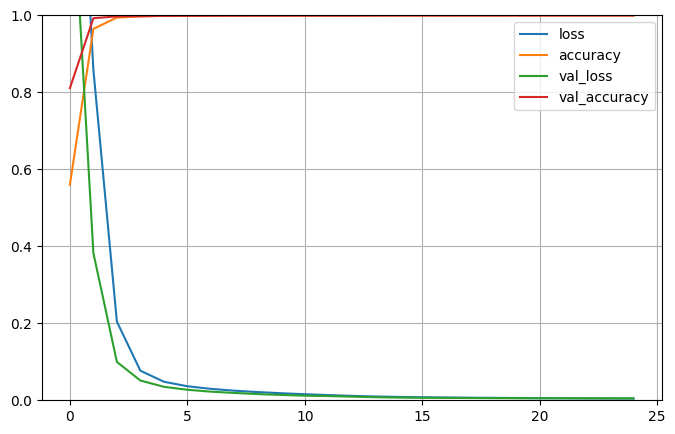

In [60]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Test the Own iPhone13_I_BeSh Model

In [61]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_I_BeSh_model.h5")

In [62]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 2s 6ms/step - loss: 0.0037 - accuracy: 0.9999
test loss, test acc: [0.0036869586911052465, 0.9998999834060669]


In [63]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

313/313 [==============================] - 2s 5ms/step
[0 6 5 ... 5 5 6]
0


In [64]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1011    0    0    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0]
 [   0    0  993    0    0    0    0    0    0    0]
 [   0    0    0  939    0    0    0    0    0    0]
 [   0    0    0    0 1042    1    0    0    0    0]
 [   0    0    0    0    0 1027    0    0    0    0]
 [   0    0    0    0    0    0  999    0    0    0]
 [   0    0    0    0    0    0    0  974    0    0]
 [   0    0    0    0    0    0    0    0 1003    0]
 [   0    0    0    0    0    0    0    0    0 1001]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00      1010
           2       1.00      1.00      1.00       993
           3       1.00      1.00      1.00       939
           4       1.00      1.00      1.00      1043
           5       1.00      1.00      1.00      1027
           6       1.00      1.00      1.00       999
           7       1.00      1.00   

Test Accuracy:0.9999


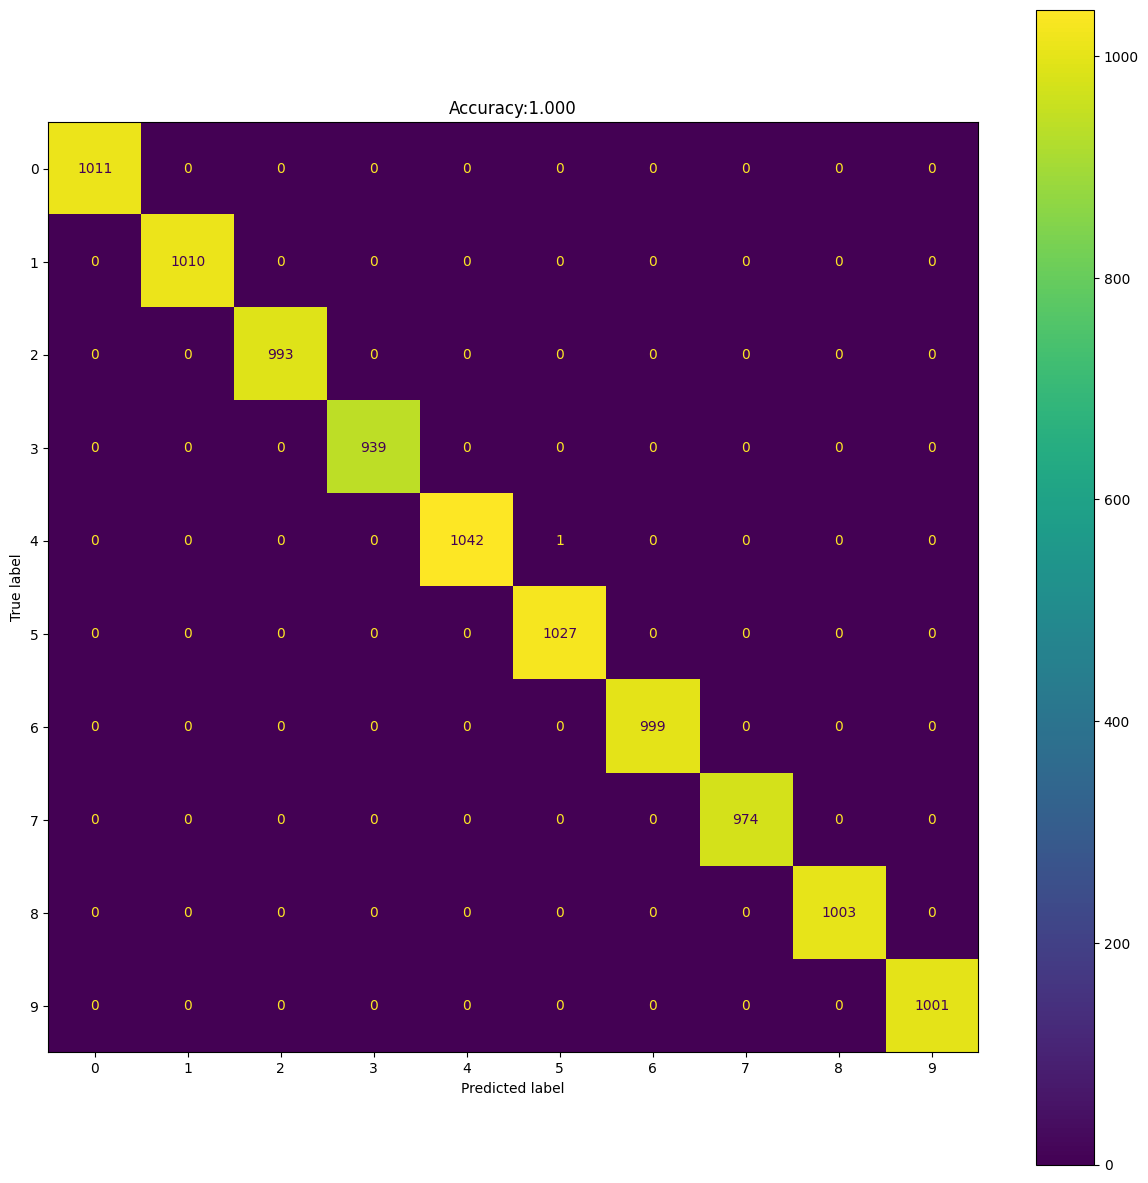

In [66]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_BeSh_confusion_matrix.pdf')

## iPhone13_I(ii) Model

In [73]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [74]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [75]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/iPHONE6S_I(ii)_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=25, validation_split=0.1, callbacks=[checkpoint_cb])